In [1]:


# confidence interval



In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:


sns.set(rc={'figure.figsize':(13, 7.5)})



In [4]:


np.random.seed(42)

normal_distribution_male_mass_pound = np.random.normal(loc=181, scale=24, size=6000)



In [5]:


normal_distribution_female_mass_pound = np.random.normal(loc=181, scale=24, size=6000)



In [6]:


all_mass_value = np.concatenate((normal_distribution_female_mass_pound, normal_distribution_male_mass_pound), axis=0)



In [7]:
df_ppl_mass = pd.DataFrame(data={'mass_pounds': all_mass_value})

In [8]:


df_ppl_mass.head()



,mass_pounds
0,154.262047
1,165.857660
2,158.390556
3,167.848100
4,175.860393


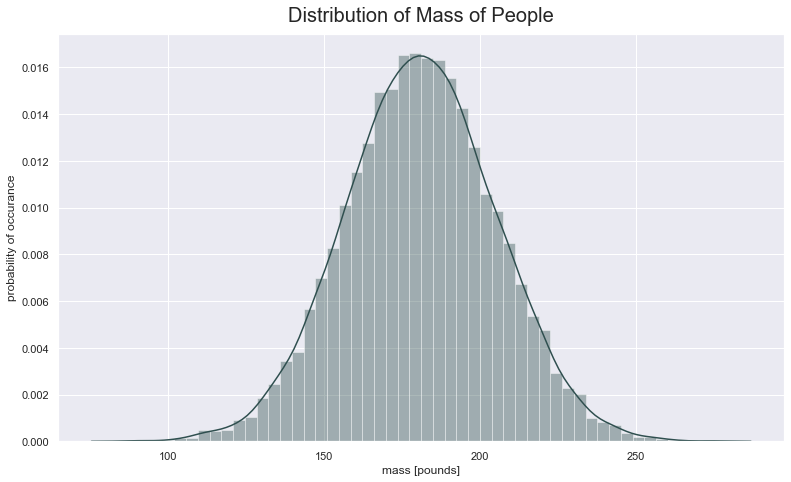

In [9]:


sns.distplot(df_ppl_mass['mass_pounds'], color='darkslategrey')
plt.xlabel('mass [pounds]')
plt.ylabel('probability of occurance')
plt.title('Distribution of Mass of People', y=1.015, fontsize=20)

plt.show()



In [10]:
# Calculate Population Mean
pop_mean_mass = df_ppl_mass['mass_pounds'].mean()
pop_mean_mass

180.855075495162

In [11]:


# Calculate Population Standard Deviation

pop_std_dev_mass = df_ppl_mass['mass_pounds'].std()
pop_std_dev_mass



24.040064351385176

In [12]:


# Sample 25 orang, 300x sample

sample_means = []
n = 25

for sample in range(0, 300):
    # random sampling
    sample_values = np.random.choice(a=df_ppl_mass['mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)



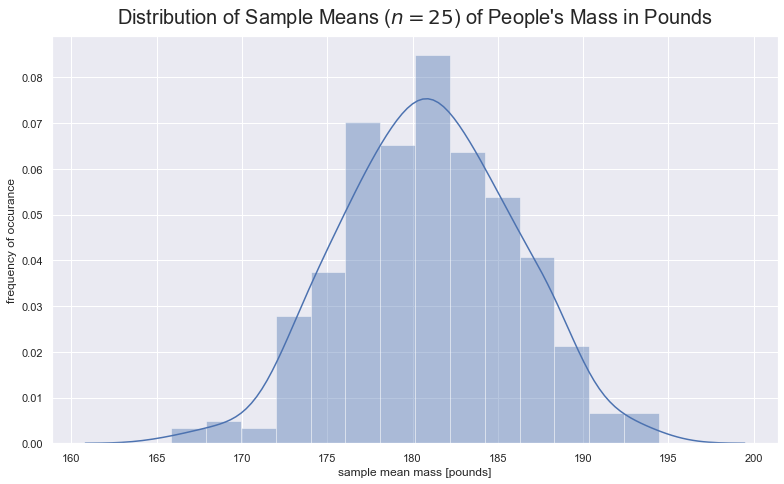

In [13]:


sns.distplot(sample_means)
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.show()



In [14]:


# Calculate Sample Means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means



180.9459323249199

In [15]:


# Clculate Std Dev of Sample Means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means



4.9476897821310155

In [17]:


# Calculate Std Error

standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error




4.808012870277035

In [18]:


gym_sample_mean = 163



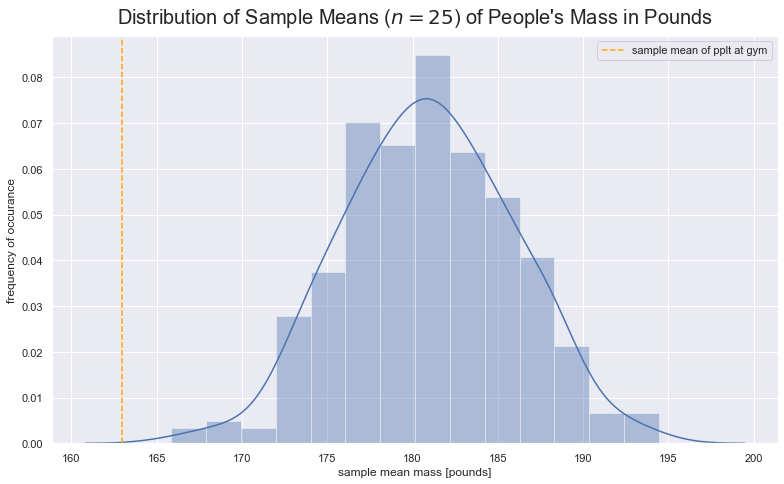

In [19]:


# visualize gym sample means to sampling distribution

sns.distplot(sample_means)
plt.axvline(x= gym_sample_mean, linestyle='--', label="sample mean of pplt at gym", c='orange')
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')
plt.legend()

plt.show()



In [20]:


lower_CI = mean_of_sample_means - 1.96*standard_error



In [21]:


upper_CI = mean_of_sample_means + 1.96*standard_error



In [22]:


print(lower_CI)
print(upper_CI)



171.52222709917692
190.3696375506629


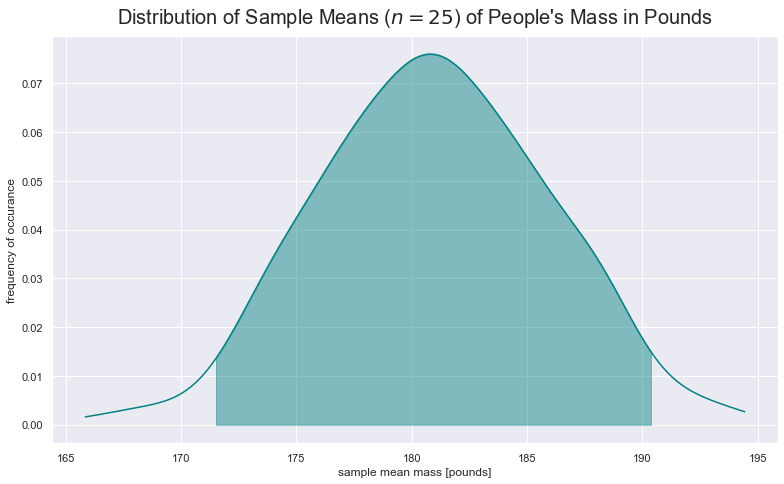

In [23]:


kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_CI, upper_CI, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.show()



In [24]:
# Probability Distribution

In [25]:
# Uniform

In [26]:
from scipy.stats import uniform

In [27]:
n = 1000
stats = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=stats, scale=width)

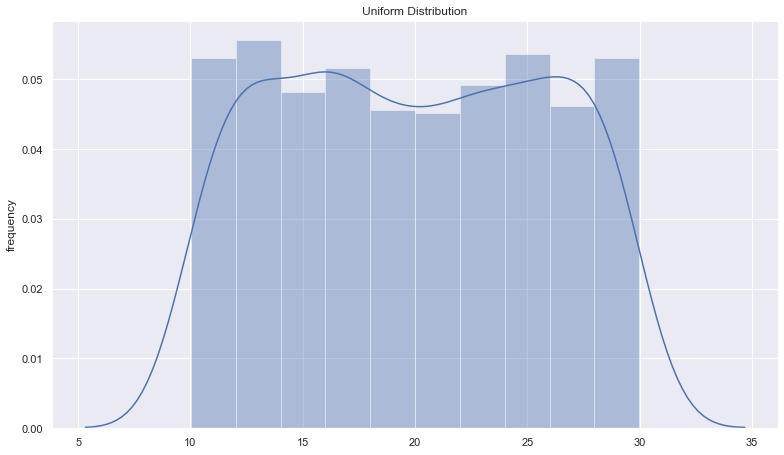

In [28]:
sns.distplot(data_uniform)
plt.title('Uniform Distribution')
plt.ylabel('frequency')
plt.show()

In [29]:
# Bernouli
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

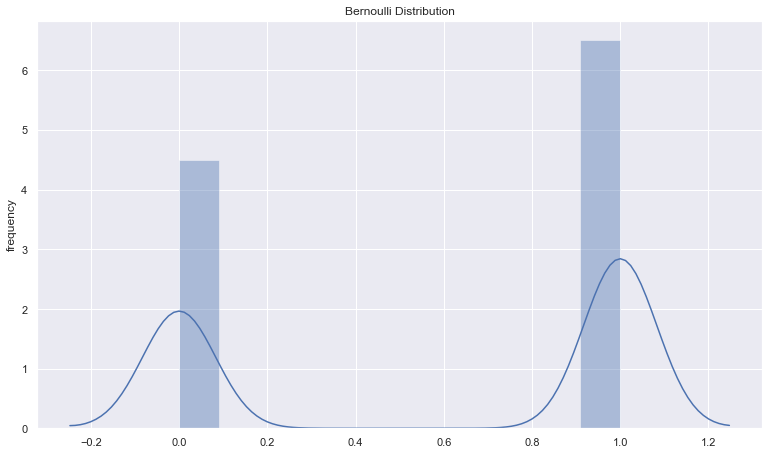

In [33]:
sns.distplot(data_bern)
plt.title('Bernoulli Distribution')
plt.ylabel('frequency')
plt.show()

In [34]:
# Binomial
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

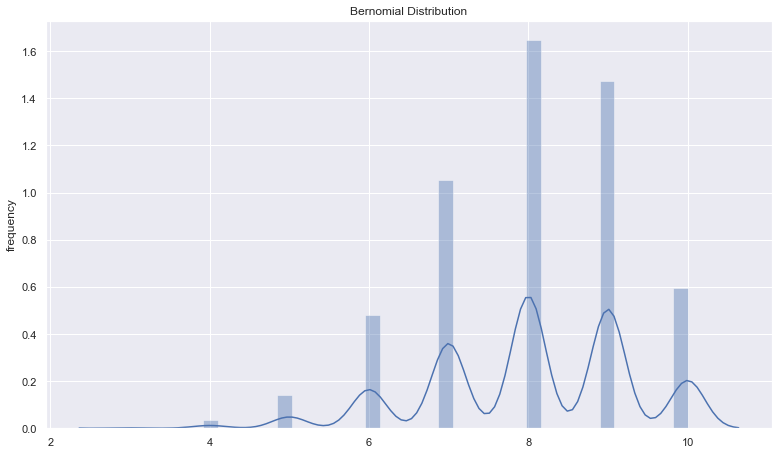

In [36]:
sns.distplot(data_binom)
plt.title('Bernomial Distribution')
plt.ylabel('frequency')
plt.show()

In [37]:
# Poisson

from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

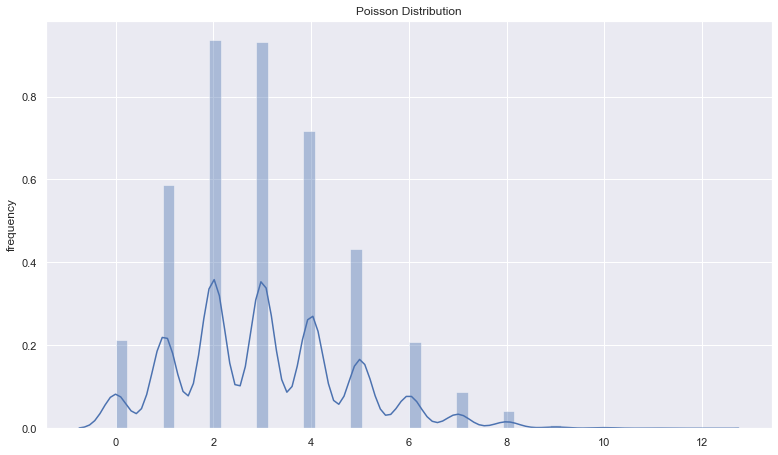

In [38]:
sns.distplot(data_poisson)
plt.title('Poisson Distribution')
plt.ylabel('frequency')
plt.show()

In [44]:
# Normal

from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=0, scale=1)

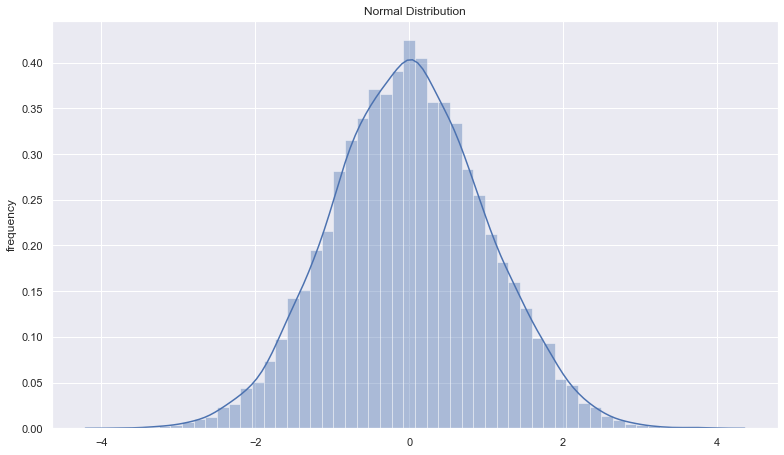

In [45]:
sns.distplot(data_normal)
plt.title('Normal Distribution')
plt.ylabel('frequency')
plt.show()

In [46]:
# Exponential

In [47]:
from scipy.stats import expon
data_expon = expon.rvs(size=10000, loc=0, scale=1)

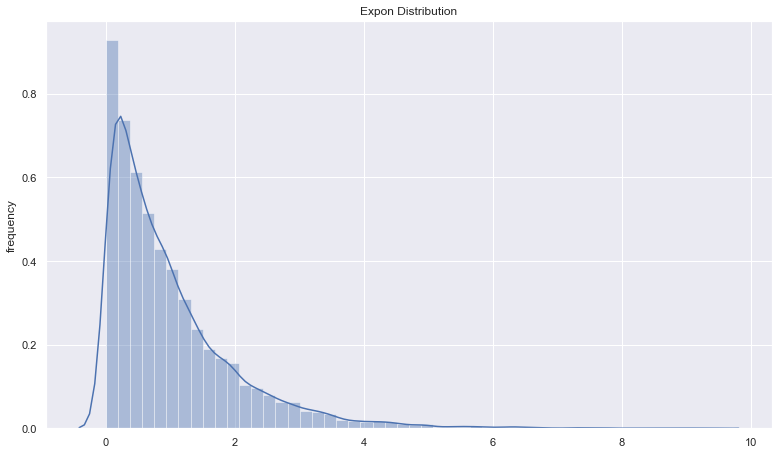

In [49]:
sns.distplot(data_expon)
plt.title('Expon Distribution')
plt.ylabel('frequency')
plt.show()

In [67]:
#Hypothesis Testing

import statsmodels.api as sm

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()



,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [68]:


females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]



In [69]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [70]:


n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)



(2759, 28.778072111846985, 6.252567616801485)

In [71]:
sm.stats.ztest(females['BMXBMI'].dropna(), male['BMXBMI'].dropna(),alternative='two-sided')



(6.1755933531383205, 6.591544431126401e-10)

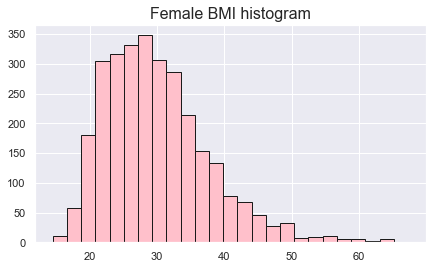

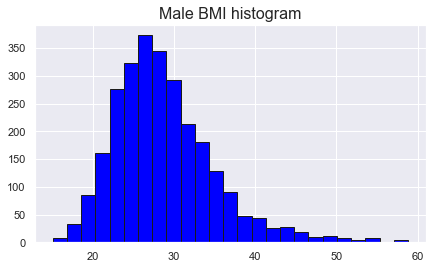

In [72]:

plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()



In [73]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline



In [74]:


x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])



In [75]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [76]:


model = LinearRegression()



In [77]:


model.fit(x, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
model = LinearRegression().fit(x, y)

In [82]:
r_sq = model.score(x,y)
print (r_sq)

0.7158756137479542


In [83]:
# yhat = b) + b1 X

print('intercept(b0):', model.intercept_)
print('slop (b1):', model.coef_)

intercept(b0): 5.633333333333329
slop (b1): [0.54]


In [84]:
y_pred= model.predict(x)
print('predicted response:',y_pred)

predicted response: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [85]:
model.predict([[66]])

array([41.27333333])

In [79]:


r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)



coefficient of determination: 0.7158756137479542


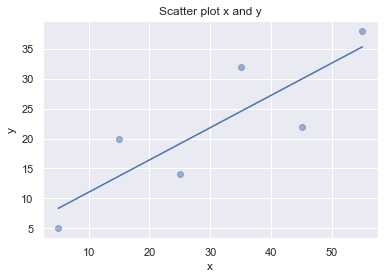

In [86]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [87]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

In [88]:
x, y = np.array(x), np.array(y)

In [89]:
x,y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [90]:
model = LinearRegression()

In [91]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
r_sq = model.score(x, y)

In [93]:
print('R2:', r_sq)
print ('B0:', model.intercept_)
print('B1:', model.coef_)

R2: 0.8615939258756776
B0: 5.522579275198183
B1: [0.44706965 0.25502548]


In [94]:
y_pred = model.predict(x)
print('predict response:', y_pred)

predict response: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [95]:
model.predict([[20, 100]])

array([39.96652039])

In [96]:
x_new = np.arange(10).reshape((-1,2))

In [98]:
x_new

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [99]:
y_new = model.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


In [100]:
# Polynomial Regression

In [101]:


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [102]:


x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])



In [103]:
x,y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]),
 array([15, 11,  2,  8, 25, 32]))

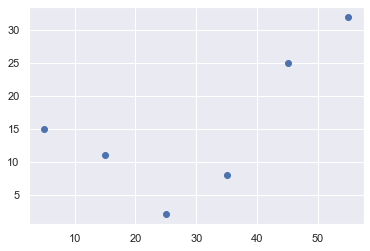

In [104]:
plt.scatter(x,y)

In [107]:
# Transform Data

transformer = PolynomialFeatures(degree=2, include_bias=False)

In [108]:
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [109]:


x_ = transformer.transform(x)



In [110]:


x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)



In [111]:


print(x_)



[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [113]:
model = LinearRegression()

In [115]:
model.fit(x_,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
r_sq = model.score(x_, y)
print('R2:', r_sq)
print('B0:', model.intercept_)
print('B1:', model.coef_)

R2: 0.8908516262498564
B0: 21.372321428571453
B1: [-1.32357143  0.02839286]


In [119]:


y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')



predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


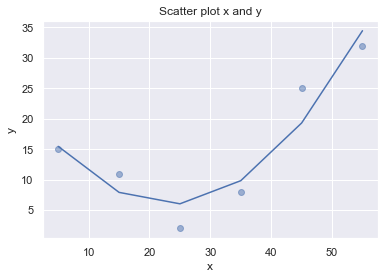

In [120]:
plt.scatter(x,y, alpha=0.5)
plt.plot(x,y_pred)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [121]:
# Linear Regression with statsmodel

In [122]:
import numpy as np
import statsmodels.api as sm

In [123]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

In [124]:
x, y = np.array(x), np.array(y)

In [125]:


x = sm.add_constant(x)



In [126]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [127]:
model = sm.OLS(y, x)

In [132]:
results = model.fit()

In [133]:
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sat, 13 Jun 2020   Prob (F-statistic):            0.00713
Time:                        15:23:09   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [137]:


print('R2:', results.rsquared)
print( results.rsquared_adj)
print( results.params)



R2: 0.8615939258756776
0.8062314962259487
[5.52257928 0.44706965 0.25502548]


In [138]:
result.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [139]:
# Implementing Linear Regression on Real Dataset

In [141]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn

data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [142]:


print(data.DESCR)



.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [143]:
import numpy as np
import pandas as pd

In [146]:


df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])


In [147]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [148]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [151]:
X = df["RM"]
y = target["MEDV"]

In [152]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):                   3.74e-256
Time:                        15:40:07   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

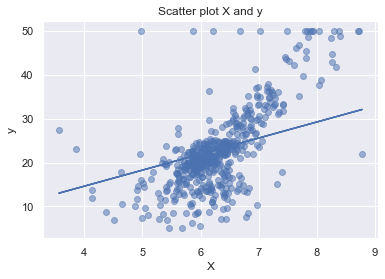

In [153]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot X and y')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [154]:
from sklearn import linear_model

In [155]:
from sklearn import datasets
data = datasets.load_boston()

In [156]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

In [157]:
x = df
y = target ['MEDV']

In [158]:
lm = linear_model.LinearRegression()

In [159]:
lm.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
lm.score(x, y)

0.7406426641094094

In [162]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv') 

In [165]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [167]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price']. values.reshape(-1,1)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [169]:
model = LinearRegression()

In [170]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
model.score(x_test, y_test)

0.6828785056545156

In [172]:
y_pred = model.predict(x_test)

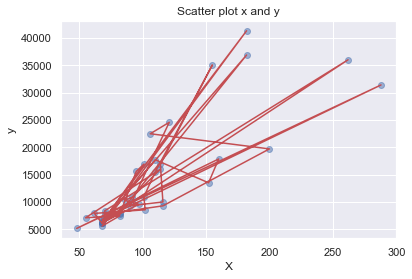

In [176]:
plt.scatter(x_test, y_test, alpha=0.5)
plt.plot(x_test, y_test, c='r')
plt.title('Scatter plot x and y')
plt.xlabel('X')
plt.ylabel('y')

plt.show()